<a href="https://colab.research.google.com/github/evansemet/Jane-Street-Solutions/blob/main/2016_03_Knight_Moves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!pip install z3-solver
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from z3 import *

In [79]:
# info given
rowsGiven = np.array([10, 34, 108, 67, 63, 84, 24, 16], dtype=int)
colsGiven = np.array([7, 14, 72, 66, 102, 90, 42, 13], dtype=int)

In [80]:
# solve function using Z3
def solve():
  print("Solving...")
  start = time.time()
  s = Tactic("qffd").solver()
  X = np.array(IntVector("x", 8 ** 2), dtype=object).reshape((8, 8))

  # spots given
  s += [X[2][3] == 11]
  s += [X[3][5] == 14]
  s += [X[4][2] == 8]
  s += [X[5][4] == 15]

  # make sure sums match
  s += [np.sum(X[r, :]) == int(val) for r, val in np.ndenumerate(rowsGiven)]
  s += [np.sum(X[:, c]) == int(val) for c, val in np.ndenumerate(colsGiven)]

  # makes sure everything from 0 to 28 and every positive number occurs once
  s += [And(val >= 0, val <= 28) for pos, val in np.ndenumerate(X)]
  s += [PbEq([(val == n, 1) for (r, c), val in np.ndenumerate(X)], 1) for n in range(1,29)]

  def moves(i, j, N):
    moves = [(2, 1), (1, 2), (-1, 2), (-2, 1), (-2, -1), (-1, -2), (1, -2), (2, -1)]
    return [(i + x, j + y) for x, y in moves if i + x >= 0 and i + x < N and j + y >= 0 and j + y < N]
  # moves in the pattern of a knight
  s += [Or(val == 0, val == 1, PbEq([(X[k][l] == val - 1, 1) for k, l in moves(i, j, 8)], 1)) for (i, j), val in np.ndenumerate(X)] 

  if s.check() == sat:
    m = s.model()
    evalu = np.vectorize(lambda x: m.evaluate(x).as_long())
    r = evalu(X)
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    ax = sns.heatmap(r == 0, annot=r, cbar=False, cmap="tab20", linecolor='k', linewidth=2, annot_kws={"fontsize":14})
    ax.axis("off")
    print(f"Solved in {time.time() - start} seconds.")
  else:
    print(f"Failed in {time.time() - start} seconds.")

Solving...
Solved in 3.58530330657959 seconds.


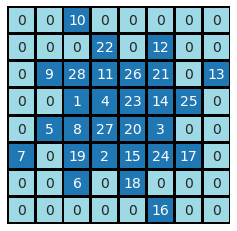

In [81]:
# runs the code
solve()